<a href="https://colab.research.google.com/github/FreeeSoul/DataScience/blob/main/20230222_FastCampus_MultinomialClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
!ls -al '/gdrive/MyDrive/data/'

total 5402
-rw------- 1 root root  337847 Jul 16  2022 data_202001.csv
-rw------- 1 root root  314682 Jul 16  2022 data_202002.csv
-rw------- 1 root root 4205435 Jul 16  2022 data_2020_1_12.csv
-rw------- 1 root root  652442 Jul 16  2022 data_2020.csv
drwx------ 2 root root    4096 Jul 16  2022 .ipynb_checkpoints
drwx------ 2 root root    4096 Jul 15  2022 TCS_영업소간통행시간_1시간_1개월_202001
drwx------ 2 root root    4096 Jul 15  2022 TCS_영업소간통행시간_1시간_1개월_202002
drwx------ 2 root root    4096 Jul 15  2022 TCS_영업소간통행시간_1시간_1개월_202003
drwx------ 2 root root    4096 Feb 19 04:10 취업캠프


In [5]:
import pandas as pd

file = '/gdrive/MyDrive/data/data_2020_1_12.csv'
data = pd.read_csv(file)
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [6]:
# 집계시, 요일에 따른 부산(140번, 거리 = 407km)까지 통행시간이 빠른/보통/늦음으로 분류 - 25% 50% 75%
data.rename(columns={'도착영업소코드' : '거리'}, inplace=True)
data

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2
...,...,...,...,...,...,...
152865,20201231,3,101,130,8806,3
152866,20201231,5,101,130,8733,3
152867,20201231,6,101,110,3173,3
152868,20201231,13,101,110,3866,3


In [7]:
data = data[data['거리'] == 140] # 항상 많이 쓰던 표 내용을 추출/거를 때 많이 하던 스킬
data

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
292,20200101,6,101,140,15824,2
293,20200101,6,101,140,19623,2
294,20200101,9,101,140,18048,2
295,20200101,17,101,140,17979,2
296,20200101,11,101,140,17349,2
...,...,...,...,...,...,...
152713,20201231,9,101,140,14460,3
152856,20201231,16,101,140,14947,3
152857,20201231,17,101,140,15328,3
152861,20201231,20,101,140,17001,3


In [8]:
data['거리'] = data['거리'].map({140 : 470})  # 표 자료 안의 내용들을 일괄적으로 바꿀 때는 map을 사용했다.
data

<ipython-input-8-1cb3efe2e7be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['거리'] = data['거리'].map({140 : 470})  # 표 자료 안의 내용들을 일괄적으로 바꿀 때는 map을 사용했다.


,집계일자,집계시,출발영업소코드,거리,통행시간,요일
292,20200101,6,101,470,15824,2
293,20200101,6,101,470,19623,2
294,20200101,9,101,470,18048,2
295,20200101,17,101,470,17979,2
296,20200101,11,101,470,17349,2
...,...,...,...,...,...,...
152713,20201231,9,101,470,14460,3
152856,20201231,16,101,470,14947,3
152857,20201231,17,101,470,15328,3
152861,20201231,20,101,470,17001,3


In [9]:
data_group = data.groupby(['집계시', '요일', '거리'])['통행시간'].mean()
data_group

집계시  요일  거리 
0    0   470    15549.675676
     1   470    15983.102564
     2   470    15129.750000
     3   470    14533.189189
     4   470    15908.275000
                    ...     
23   2   470    16006.125000
     3   470    16118.288889
     4   470    17035.450980
     5   470    16033.622222
     6   470    15297.022727
Name: 통행시간, Length: 168, dtype: float64

In [10]:
data_group = data_group.unstack(level=-1)
data_group = data_group.reset_index()
data_group

거리,집계시,요일,470
0,0,0,15549.675676
1,0,1,15983.102564
2,0,2,15129.750000
3,0,3,14533.189189
4,0,4,15908.275000
...,...,...,...
163,23,2,16006.125000
164,23,3,16118.288889
165,23,4,17035.450980
166,23,5,16033.622222


In [11]:
data_group.dropna()

거리,집계시,요일,470
0,0,0,15549.675676
1,0,1,15983.102564
2,0,2,15129.750000
3,0,3,14533.189189
4,0,4,15908.275000
...,...,...,...
163,23,2,16006.125000
164,23,3,16118.288889
165,23,4,17035.450980
166,23,5,16033.622222


In [12]:
stat = data_group.describe()
stat # 

거리,집계시,요일,470
count,168.000000,168.000000,168.000000
mean,11.500000,3.000000,15781.256504
std,6.942881,2.005979,649.799175
min,0.000000,0.000000,14232.461538
25%,5.750000,1.000000,15272.221805
50%,11.500000,3.000000,15838.602578
75%,17.250000,5.000000,16113.439869
max,23.000000,6.000000,17630.525424


In [13]:
def check(input):
  if input < 15272.221805:
    return 0
  elif input < 16113.439869:
    return 1
  else:
    return 2

In [21]:
data_grade = pd.DataFrame(columns=['time', 'day', 'grade'])
data_grade

,time,day,grade


In [25]:
for index, item in data_group.iterrows(): # 우리가 사용하는 표 자료는 데이터프레임 자료형이고, 데이터 프레임을 for문에서 내부적으로 세세히 조정하고 싶으면 iterrows()를 사용하면 된다.
  data_grade = data_grade.append({'time' : item['집계시'], 'day' : item['요일'], 'grade' : check(item[470])}, ignore_index=True)
data_grade

,time,day,grade
0,0.0,0.0,1.0
1,0.0,1.0,1.0
2,0.0,2.0,0.0
3,0.0,3.0,0.0
4,0.0,4.0,1.0
...,...,...,...
163,23.0,2.0,1.0
164,23.0,3.0,2.0
165,23.0,4.0,2.0
166,23.0,5.0,1.0


In [26]:
data_list = data_grade.values.tolist()
data_list

[[0.0, 0.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 2.0, 0.0],
 [0.0, 3.0, 0.0],
 [0.0, 4.0, 1.0],
 [0.0, 5.0, 1.0],
 [0.0, 6.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 1.0, 1.0],
 [1.0, 2.0, 0.0],
 [1.0, 3.0, 0.0],
 [1.0, 4.0, 0.0],
 [1.0, 5.0, 0.0],
 [1.0, 6.0, 0.0],
 [2.0, 0.0, 0.0],
 [2.0, 1.0, 1.0],
 [2.0, 2.0, 1.0],
 [2.0, 3.0, 0.0],
 [2.0, 4.0, 1.0],
 [2.0, 5.0, 0.0],
 [2.0, 6.0, 0.0],
 [3.0, 0.0, 0.0],
 [3.0, 1.0, 1.0],
 [3.0, 2.0, 1.0],
 [3.0, 3.0, 0.0],
 [3.0, 4.0, 1.0],
 [3.0, 5.0, 0.0],
 [3.0, 6.0, 0.0],
 [4.0, 0.0, 0.0],
 [4.0, 1.0, 1.0],
 [4.0, 2.0, 1.0],
 [4.0, 3.0, 0.0],
 [4.0, 4.0, 1.0],
 [4.0, 5.0, 0.0],
 [4.0, 6.0, 0.0],
 [5.0, 0.0, 0.0],
 [5.0, 1.0, 1.0],
 [5.0, 2.0, 2.0],
 [5.0, 3.0, 0.0],
 [5.0, 4.0, 2.0],
 [5.0, 5.0, 0.0],
 [5.0, 6.0, 0.0],
 [6.0, 0.0, 0.0],
 [6.0, 1.0, 0.0],
 [6.0, 2.0, 2.0],
 [6.0, 3.0, 0.0],
 [6.0, 4.0, 1.0],
 [6.0, 5.0, 0.0],
 [6.0, 6.0, 1.0],
 [7.0, 0.0, 0.0],
 [7.0, 1.0, 0.0],
 [7.0, 2.0, 2.0],
 [7.0, 3.0, 1.0],
 [7.0, 4.0, 2.0],
 [7.0, 5.0, 1.0],
 [7.0, 6.0

In [27]:
x_train = []
y_train = []

for r in data_list:
  x_train.append(r[:2])
  y_train.append(r[-1])

In [30]:
import tensorflow as tf

learning_rate = 1e-4
learning_epoch = 5000

sgd = tf.keras.optimizers.SGD(learning_rate)

In [32]:
y_one_hot = tf.keras.utils.to_categorical(y_train)
y_one_hot

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0

In [31]:
model = tf.keras.models.Sequential()

In [33]:
model.add(tf.keras.layers.Dense(3, input_shape=(2, ), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [37]:
import numpy as np

history = model.fit(np.array(x_train), np.array(y_one_hot), epochs=learning_epoch)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6/6 [==============================] - 0s 3ms/step - loss: 0.8881 - accuracy: 0.5357
Epoch 2502/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.8881 - accuracy: 0.5357
Epoch 2503/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.8883 - accuracy: 0.5357
Epoch 2504/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.8881 - accuracy: 0.5357
Epoch 2505/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.8881 - accuracy: 0.5357
Epoch 2506/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.8882 - accuracy: 0.5357
Epoch 2507/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.8883 - accuracy: 0.5357
Epoch 2508/5000
6/6 [==============================] - 0s 4ms/step - loss: 0.8882 - accuracy: 0.5357
Epoch 2509/5000
6/6 [==============================] - 0s 3ms/step - loss: 0.8883 - accuracy: 0.5357
Epoch 2510/5000
6/6 [==============================] - 0s 4ms/step - lo

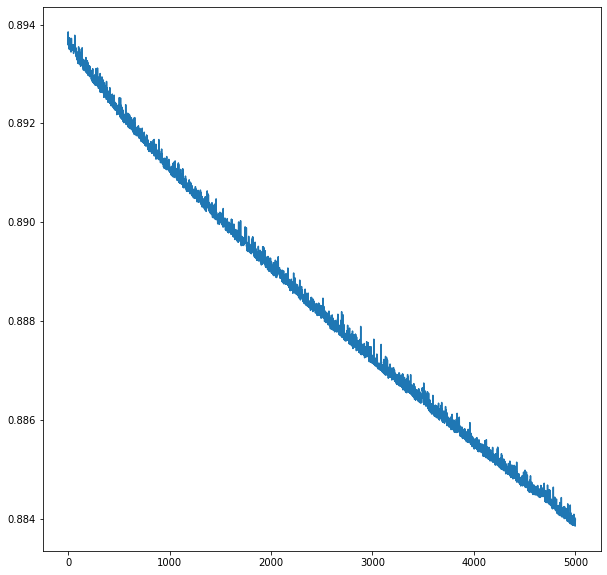

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])